In [129]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './__datasets/birthweight_low.xlsx'


# reading the file into Python
weight = pd.read_excel(io = file)


# outputting the first ten rows of the dataset
weight.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [130]:
weight.info() #checking info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [131]:
print(f"""
Size of Original Dataset
------------------------
Observations: {weight.shape[0]}
Features:     {weight.shape[1]}
""")         #checking the rows and columns of data set


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [132]:
for column in weight:
    print(column)  #printing dataset columns

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght


In [ ]:
#Continuous
mage
fage
bwght

#Interval/Count
meduc
monpre
npvis
feduc
omaps
fmaps
cigs
drink

#Categorical/Other
male
mwhte
mblck
moth
fwhte
fblck
foth


In [133]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """bwght ~ fage""",
                                     data = weight)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     36.08
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           9.20e-09
Time:                        19:19:05   Log-Likelihood:                -1529.4
No. Observations:                 196   AIC:                             3063.
Df Residuals:                     194   BIC:                             3069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4454.2093    191.275     23.287      0.0

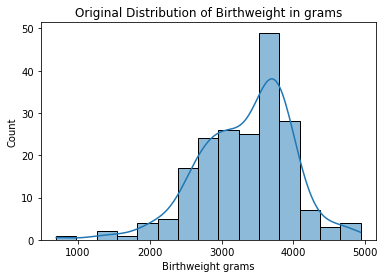

In [134]:
# developing a histogram using HISTPLOT
sns.histplot(data   = weight,
             x      = "bwght",
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight in grams")
plt.xlabel(xlabel = "Birthweight grams") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [135]:
# log transforming Birthweight and saving it to the dataset
weight['log_bwght'] = np.log(weight['bwght'])

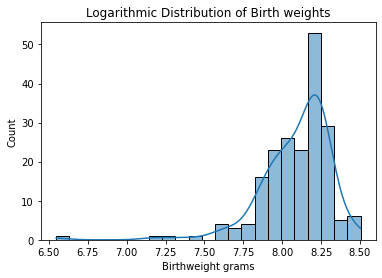

In [136]:
#developing a histogram using HISTPLOT/Didn't work
sns.histplot(data = weight,
                x = "log_bwght",
              kde = True)

#title and axis labels
plt.title(label   = "Logarithmic Distribution of Birth weights")
plt.xlabel(xlabel = "Birthweight grams")
plt.ylabel(ylabel = "Count")

#displaying the histogram
plt.show()

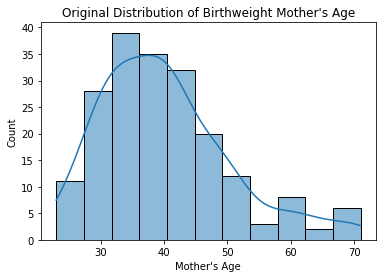

In [137]:
#using histograms to check features for skewness
sns.histplot(data = weight,
             x    = "mage",
             kde  = True)

#rendering the plot
plt.title(label   = "Original Distribution of Birthweight Mother's Age")
plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = "Count")

plt.show()


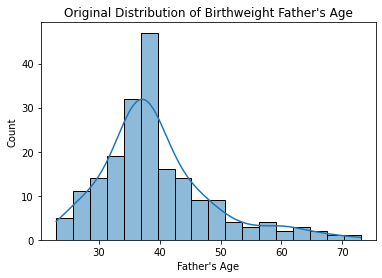

In [138]:
#using histograms to check features for skewness
sns.histplot(data = weight,
             x    = "fage",
             kde  = True)

#rendering the plot
plt.title(label   = "Original Distribution of Birthweight Father's Age")
plt.xlabel(xlabel = "Father's Age")
plt.ylabel(ylabel = "Count")

plt.show()

In [140]:
#building a base model with a log transformed response variable
#instantiating a model type
lm_best = smf.ols(formula = """log_bwght ~ fage""",
                  data = weight)

#Step 2: Fit the data into the model object 
results = lm_best.fit()

#Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     39.23
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.37e-09
Time:                        19:20:39   Log-Likelihood:                 26.587
No. Observations:                 196   AIC:                            -49.17
Df Residuals:                     194   BIC:                            -42.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5055      0.068    124.665      0.0

<h2>Missing Values</h2>

In [141]:
#Review of Missing Values

weight.isnull().sum(axis = 0)

mage         0
meduc        3
monpre       0
npvis        3
fage         0
feduc        7
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
dtype: int64

In [142]:
#looping to detect features with missing values

for col in weight:
    #creating columns with 1s if missing and 0 if not
    if weight[col].isnull().astype(int).sum() > 0:
        weight['m_'+col] = weight[col].isnull().astype(int)
        
#summing the missing values flags to check the result of the loop above
weight.iloc[ : , -3:    ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

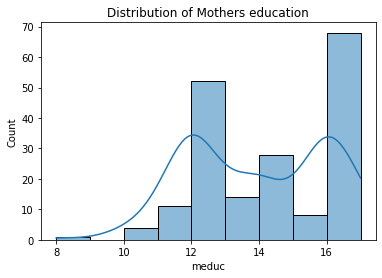

In [143]:
# creating a dropped dataset to visualize 'Meduc'
df_dropped = weight.dropna()


# displaying the plot for 'Meduc'
sns.histplot(x   = 'meduc',
            data = df_dropped,
            kde  = True)


# title and labels
plt.title('Distribution of Mothers education')


# displaying the plot
plt.show()

In [144]:
median_meduc = weight['meduc'].median()
median_npvis = weight['npvis'].median()
median_feduc = weight['feduc'].median()

print(f"""
The median of Mother education is: {median_meduc}
The median number of prenatal visit: {median_npvis}
The median of Father education is: {median_feduc}

""")    #print function to calculate median values for missing values


The median of Mother education is: 14.0
The median number of prenatal visit: 12.0
The median of Father education is: 14.0




In [145]:
#instantiating an imputation value for number of prenatal visits at median of 12
fill = 12

#imputing 'npvis'
weight['npvis'] = weight['npvis'].fillna(value = fill)

In [146]:
#Lets assume for mother and father's education the missing values can be
#median education calculated

#imputing everything else with the zero
#meduc
fill = 14
weight['meduc'] = weight['meduc'].fillna(value = fill)

#feduc
fill = 14
weight['feduc'] = weight['feduc'].fillna(value = fill)

In [147]:
weight.isnull().any(axis = 0)

mage         False
meduc        False
monpre       False
npvis        False
fage         False
feduc        False
omaps        False
fmaps        False
cigs         False
drink        False
male         False
mwhte        False
mblck        False
moth         False
fwhte        False
fblck        False
foth         False
bwght        False
log_bwght    False
m_meduc      False
m_npvis      False
m_feduc      False
dtype: bool

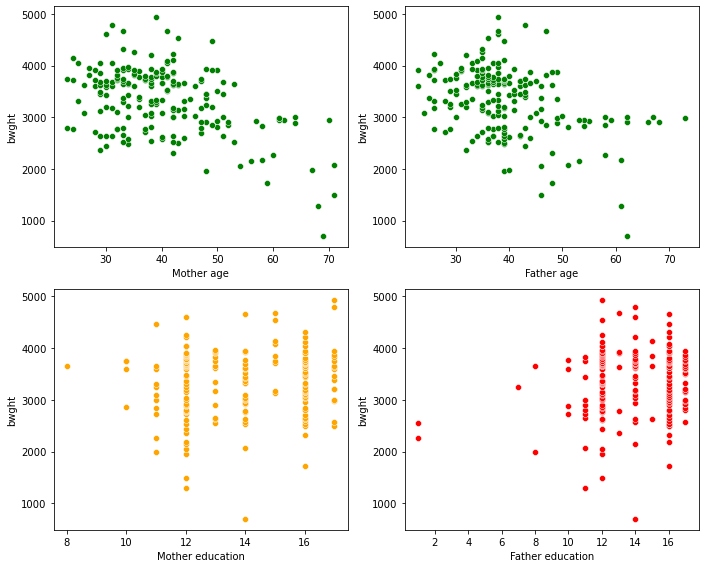

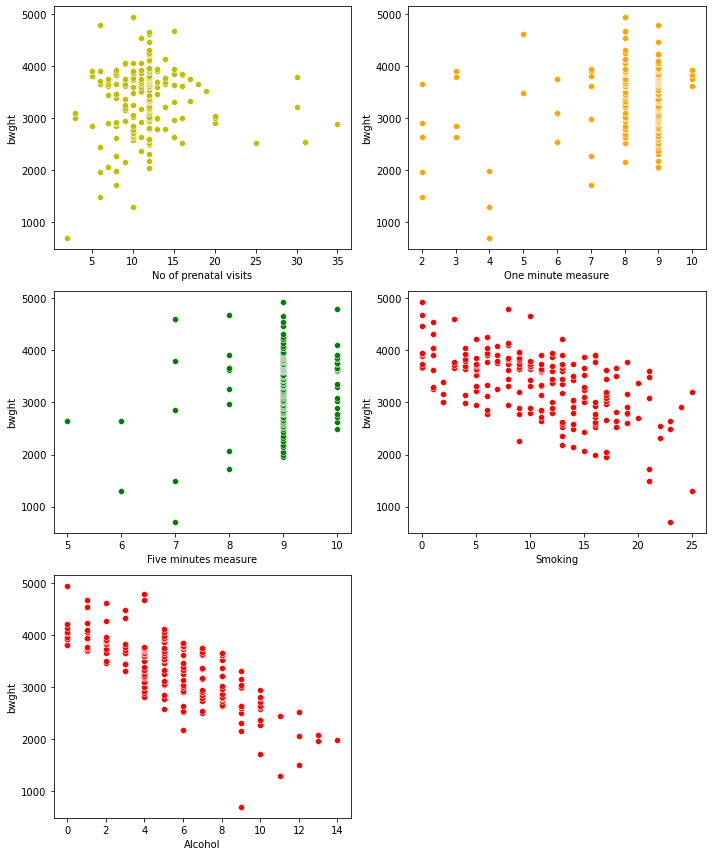

In [148]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = weight['mage'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother age')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = weight['fage'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father age')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = weight['meduc'],
                y = weight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother education')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = weight['feduc'],
                y = weight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father education')
plt.ylabel(ylabel = 'bwght')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/weight Scatterplots 1 of 2.png')
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = weight['npvis'],
                y = weight['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'No of prenatal visits')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = weight['omaps'],
                y = weight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'One minute measure')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = weight['fmaps'],
                y = weight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Five minutes measure')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = weight['cigs'],
                y = weight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Smoking')
plt.ylabel(ylabel = 'bwght')


########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = weight['drink'],
                y = weight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Alcohol')
plt.ylabel(ylabel = 'bwght')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./__analysis_images/weight Scatterplots 2 of 2.png')
plt.show()

In [149]:
#Using subsetting to check the value counts for all variables that appear to have alarge amount of zeros
#counting the number of zeroes for 
mage_zeroes  = len(weight['mage'][weight['mage'] == 0])
fage_zeroes  = len(weight['fage'][weight['fage'] == 0])

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Mothers age    | {mage_zeroes}\t\t{len(weight) - mage_zeroes}
Fathers age    | {fage_zeroes}\t\t{len(weight) - fage_zeroes}
""")


                 No		Yes
               ---------------------
Mothers age    | 0		196
Fathers age    | 0		196



In [ ]:
#meduc_zeroes = len(weight['meduc'][weight['meduc'] == 0])
feduc_zeroes = len(weight['feduc'][weight['feduc'] == 0])
npvis_zeroes = len(weight['npvis'][weight['npvis'] == 0])

#Mother educ    | {meduc_zeroes}\t\t{len(weight) - meduc_zeroes}
Fathers educ   | {feduc_zeroes}\t\t{len(weight) - feduc_zeroes}
Prenatal vis   | {npvis_zeroes}\t\t{len(weight) - npvis_zeroes}

Working with Interval and Count Data

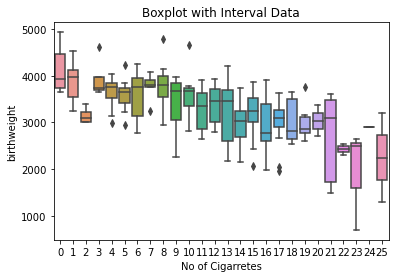

In [150]:
# developing a boxplot
sns.boxplot(x    = 'cigs',
            y    = 'bwght',
            data = weight)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'No of Cigarretes')
plt.ylabel(ylabel = 'birthweight')


# displaying the plot
plt.show()

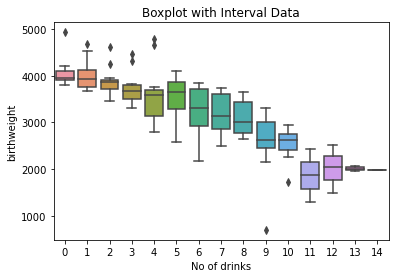

In [151]:
# developing a boxplot
sns.boxplot(x    = 'drink',
            y    = 'bwght',
            data = weight)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'No of drinks')
plt.ylabel(ylabel = 'birthweight')


# displaying the plot
plt.show()

In [152]:
print(f"""
Count of X variables
==================

----------
Mother prenetal
----------
{weight['monpre'].value_counts(normalize = False).sort_index()}


----------
Other X variables
----------
{weight['omaps'].value_counts(normalize = False).sort_index()}

{weight['fmaps'].value_counts(normalize = False).sort_index()}

{weight['cigs'].value_counts(normalize = False).sort_index()}

{weight['drink'].value_counts(normalize = False).sort_index()}

""")


Count of X variables

----------
Mother prenetal
----------
1    45
2    93
3    33
4    13
5     4
6     2
7     3
8     3
Name: monpre, dtype: int64


----------
Other X variables
----------
2       5
3       4
4       3
5       2
6       3
7       7
8      57
9     111
10      4
Name: omaps, dtype: int64

5       1
6       2
7       5
8       8
9     159
10     21
Name: fmaps, dtype: int64

0      9
1      8
2      4
3      4
4      8
5     11
6      9
7      5
8     11
9     11
10    10
11    13
12     9
13    15
14    11
15     9
16    11
17    12
18     5
19     6
20     2
21     5
22     2
23     3
24     1
25     2
Name: cigs, dtype: int64

0     11
1     12
2     12
3     10
4     35
5     27
6     21
7     19
8     19
9     12
10    10
11     2
12     3
13     2
14     1
Name: drink, dtype: int64




In [153]:
# counting the number of zeroes for 
monpre_zeroes   = len(weight['monpre'][weight['monpre'] == 0]) 
omaps_zeroes     = len(weight['omaps'][weight['omaps'] == 0])
fmaps_zeroes = len(weight['fmaps'][weight['fmaps'] == 0])
cigs_zeroes  = len(weight['cigs'][weight['cigs'] == 0])
drink_zeroes = len(weight['drink'][weight['drink'] == 0])
## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Monpre       | {monpre_zeroes}\t\t{len(weight) - monpre_zeroes}
Omaps        | {omaps_zeroes}\t\t{len(weight) - omaps_zeroes}
Fmaps        | {fmaps_zeroes}\t\t{len(weight) - fmaps_zeroes}
Smoking      | {cigs_zeroes}\t\t{len(weight) - cigs_zeroes}
Drinking     | {drink_zeroes}\t\t{len(weight) - drink_zeroes}
""")


                 No		Yes
               ---------------------
Monpre       | 0		196
Omaps        | 0		196
Fmaps        | 0		196
Smoking      | 9		187
Drinking     | 11		185



In [154]:
df_corr = weight.corr().round(2)

print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght        1.00
log_bwght    0.97
omaps        0.25
fmaps        0.25
feduc        0.13
mblck        0.13
fblck        0.12
male         0.11
meduc        0.09
npvis        0.06
m_npvis      0.06
m_feduc     -0.00
moth        -0.02
fwhte       -0.04
monpre      -0.05
foth        -0.08
mwhte       -0.11
m_meduc     -0.13
fage        -0.40
mage        -0.46
cigs        -0.57
drink       -0.74
Name: bwght, dtype: float64


In [155]:
weight.isnull().any(axis = 0)

mage         False
meduc        False
monpre       False
npvis        False
fage         False
feduc        False
omaps        False
fmaps        False
cigs         False
drink        False
male         False
mwhte        False
mblck        False
moth         False
fwhte        False
fblck        False
foth         False
bwght        False
log_bwght    False
m_meduc      False
m_npvis      False
m_feduc      False
dtype: bool

In [156]:
weight_explanatory = weight.copy()


# dropping SalePrice and Order from the explanatory variable set
weight_explanatory = weight_explanatory.drop(['bwght','log_bwght'
                                             ], axis = 1)


# formatting each explanatory variable for statsmodels
for val in weight_explanatory:
    print(f"{val} +")

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
m_meduc +
m_npvis +
m_feduc +


In [157]:
# saving feature-rich dataset in Excel
weight.to_excel('./__datasets/weight_feature_rich_FINAL.xlsx',
                 index = False)

In [125]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage +
cigs +
drink +
fwhte +
fblck +
foth +
m_npvis
""",
                  data = weight)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     77.25
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.30e-48
Time:                        19:16:13   Log-Likelihood:                -1424.7
No. Observations:                 196   AIC:                             2863.
Df Residuals:                     189   BIC:                             2886.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3699.2099     80.390     46.016      0.0

In [56]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ mage +
cigs +
drink +
m_npvis
""",
                  data = weight)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     116.9
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.08e-50
Time:                        18:32:38   Log-Likelihood:                -1424.8
No. Observations:                 196   AIC:                             2860.
Df Residuals:                     191   BIC:                             2876.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4928.1496    105.973     46.504      0.0

In [119]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """bwght ~ omaps +
fmaps +
feduc + 
mblck +
fblck +
male  +
meduc +
m_npvis
""",
                  data = weight)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     3.088
Date:                Wed, 24 Nov 2021   Prob (F-statistic):            0.00270
Time:                        19:10:55   Log-Likelihood:                -1533.9
No. Observations:                 196   AIC:                             3086.
Df Residuals:                     187   BIC:                             3115.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    833.1648    725.593      1.148      0.2

In [158]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#specifying the path and file name
file = './__datasets/weight_feature_rich_FINAL.xlsx'

#reading the file into Python
weight = pd.read_excel(io = file)

#checking the file
weight.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,m_meduc,m_npvis,m_feduc
0,69,14,5,2,62,14,4,7,23,9,1,0,1,0,0,1,0,697,6.546785,1,0,1
1,68,12,3,10,61,11,4,6,25,11,1,1,0,0,1,0,0,1290,7.162397,0,0,0
2,71,12,3,6,46,12,2,7,21,12,1,0,1,0,0,1,0,1490,7.306531,0,0,0
3,59,16,1,8,48,16,7,8,21,10,0,0,0,1,0,0,1,1720,7.450080,0,0,0
4,48,12,4,6,39,12,2,9,17,13,0,1,0,0,1,0,0,1956,7.578657,0,0,0


In [159]:
#preparing explanatory variable data

weight_data = weight.drop(["bwght",
                          "log_bwght"],
                          axis = 1)

#preparing the response variables
weight_target = weight.loc[ : , "bwght"]
log_weight_target = weight.loc[ : ,"log_bwght"]

#preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
              weight_data,
              weight_target,
              test_size = 0.25,
              random_state = 219)

#checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}

Testing Data
-------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 20)
y-side: (147,)

Testing Data
-------------
X-side: (49, 20)
y-side: (49,)



In [160]:
#declaring set of x-variables
x_variables = ['mage','cigs','drink','m_npvis']

#looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

mage +
cigs +
drink +
m_npvis +


In [161]:
#merging X-train and y_train so that they can be used in statsmodels
weight_train = pd.concat([x_train, y_train], axis = 1)

#step 1: build a model
lm_best = smf.ols(formula = """bwght ~ mage +
cigs +
drink +
m_npvis
""",
                 data = weight_train)

#Step 2: fit the model based on the data
results = lm_best.fit()

#Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     89.64
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           7.34e-38
Time:                        19:24:36   Log-Likelihood:                -1072.1
No. Observations:                 147   AIC:                             2154.
Df Residuals:                     142   BIC:                             2169.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5068.1017    123.971     40.881      0.0

In [162]:
#applying model in scikit-learn

#preparing x-variables from the OLS model
ols_data = weight.loc[ : , x_variables]

#preparing the response variable
weight_target = weight.loc[ : , 'bwght']


#Setting up more than one train-test split
#Full X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
              weight_data, #x-variables
              weight_target, #y-variables
              test_size = 0.25,
              random_state = 219)

#OLS p-value x-dataset (normal Y)

x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
             ols_data,  #x-variables
             weight_target, #y-variable
             test_size = 0.25,
             random_state = 219)

In [163]:
#Instantiating a model object
lr = LinearRegression()

#Fitting to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)

#Predicting on new data
lr_pred = lr_fit.predict(x_test_OLS)

#Scoring the results
print('OLS Training Score:', lr.score(x_train_OLS, y_train_OLS).round(4)) #using R-square
print('OLS Testing Score:',  lr.score(x_test_OLS, y_test_OLS).round(4)) #using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4) 

#displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score: 0.7163
OLS Testing Score: 0.6569
OLS Train-Test Gap : 0.0594


In [164]:
#zipping each feature name to its coefficient
lr_model_values = zip(weight_data[x_variables].columns,
                     lr_fit.coef_.round(decimals = 2))

#setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]

#printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    
#checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 5068.1)
('mage', -17.79)
('cigs', -38.48)
('drink', -107.98)
('m_npvis', 357.52)


In [165]:
import sklearn.linear_model #linear models

In [92]:
np.any(np.isnan(weight))

False

In [166]:
#Instantiating a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                        normalize = True)

#Fitting to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)

#Predicting on new data
lasso_pred = lasso_fit.predict(x_test_FULL)

#Scoring the result
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))

#saving the scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) #using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4) #using R-square

#displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7436
Lasso Testing Score : 0.6179
Lasso Train-Test Gap : 0.1257


C:\Users\IFEAJ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [180]:
#Zipping each feature name to its coefficient
lasso_model_values = zip(weight_data.columns,lasso_fit.coef_.round(decimals = 2))

#setting up a placholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]

#printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    
#checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3807.03)
('mage', -13.71)
('meduc', 17.78)
('monpre', 0.0)
('npvis', 0.68)
('fage', -2.7)
('feduc', 15.04)
('omaps', 0.0)
('fmaps', 76.79)
('cigs', -37.64)
('drink', -98.43)
('male', 46.33)
('mwhte', 0.0)
('mblck', 0.0)
('moth', -73.95)
('fwhte', -0.0)
('fblck', 0.0)
('foth', -0.0)
('m_meduc', -232.89)
('m_npvis', 349.49)
('m_feduc', 0.0)


In [181]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
    
    if coefficient == 0:
        lasso_model_lst.remove((feature, coefficient))
        
#checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3807.03)
('mage', -13.71)
('meduc', 17.78)
('npvis', 0.68)
('fage', -2.7)
('feduc', 15.04)
('fmaps', 76.79)
('cigs', -37.64)
('drink', -98.43)
('male', 46.33)
('mblck', 0.0)
('moth', -73.95)
('fblck', 0.0)
('m_meduc', -232.89)
('m_npvis', 349.49)


In [182]:
#instantiating a model object

ard_model = sklearn.linear_model.ARDRegression(normalize = False)

#Fitting the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)

#Predicting on new data
ard_pred = ard_fit.predict(x_test_FULL)

print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score:', ard_model.score(x_test_FULL, y_test_FULL).round(4))

#saving the scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)

#displaying and saving the gap between the training and testing
print('ARD Train-Test Gap:', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7386
Testing Score: 0.631
ARD Train-Test Gap: 0.1076


C:\Users\IFEAJ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [183]:
#Zipping each feature name to its coefficient
ard_model_values = zip(weight_data.columns, ard_fit.coef_.round(decimals = 5))

#setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]

#printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    
#checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3938.73)
('mage', -15.63527)
('meduc', 15.82983)
('monpre', 1e-05)
('npvis', 0.00118)
('fage', -0.09886)
('feduc', 11.64822)
('omaps', 0.00039)
('fmaps', 73.53206)
('cigs', -39.07319)
('drink', -102.65009)
('male', 14.66144)
('mwhte', 0.00074)
('mblck', 0.0003)
('moth', -51.48836)
('fwhte', -2e-05)
('fblck', 0.00049)
('foth', -0.00061)
('m_meduc', -127.00433)
('m_npvis', 284.51505)
('m_feduc', 6e-05)


In [184]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one

for feature, coefficient in ard_model_lst:
    
    if coefficient == 0:
        ard_model_lst.remove((feature, coefficient))
        
#checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3938.73)
('mage', -15.63527)
('meduc', 15.82983)
('monpre', 1e-05)
('npvis', 0.00118)
('fage', -0.09886)
('feduc', 11.64822)
('omaps', 0.00039)
('fmaps', 73.53206)
('cigs', -39.07319)
('drink', -102.65009)
('male', 14.66144)
('mwhte', 0.00074)
('mblck', 0.0003)
('moth', -51.48836)
('fwhte', -2e-05)
('fblck', 0.00049)
('foth', -0.00061)
('m_meduc', -127.00433)
('m_npvis', 284.51505)
('m_feduc', 6e-05)


In [192]:
# comparing results

print(f"""
Model      Train Score      Test Score          Train-Test Gap
-----      -----------      ----------           -------------
*OLS        {lr_train_score}           {lr_test_score}            {lr_test_gap}
Lasso       {lasso_train_score}           {lasso_test_score}            {lasso_test_gap}
ARD         {ard_train_score}           {ard_test_score}             {ard_test_gap}

*OLS is the final model
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./__model_results/linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score          Train-Test Gap
-----      -----------      ----------           -------------
*OLS        0.7163           0.6569            0.0594
Lasso       0.7436           0.6179            0.1257
ARD         0.7386           0.631             0.1076

*OLS is the final model

